In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
data_2005 = pd.read_csv('../data/Data2005.csv', sep=";")
data_2005.columns = data_2005.columns.str.replace(' ', '')
data_2005 = data_2005.fillna(0.0)
data_2006 = pd.read_csv('../data/Data2006.csv', sep=";")
data_2006.columns = data_2006.columns.str.replace(' ', '')
data_2006 = data_2006.fillna(0.0)
col = ['Date', 'Avg', 'Rain', 'DD', 'DDSum', 'Trap1_Count','Trap2_Count']

In [3]:
data_2005.columns

Index(['Date', 'Min', 'Max', 'Avg', 'AvgII', 'Dev', 'Dev%', 'Rain', 'DD',
       'DDSum', 'Trap1_Count', 'SumTrap1', 'Trap2_Count', 'SumTrap2',
       'CountTrap3', 'SumTrap3', 'Sum'],
      dtype='object')

In [4]:
def prepare_data(df, columns: list):
    df = df.filter(columns)
    df["Trap1_Count"].where(df["Trap1_Count"] == 0.0, other=(df["Trap1_Count"].fillna(method='ffill') + df["Trap1_Count"].fillna(method='bfill'))/2, inplace=True)
    df["Trap2_Count"].where(df["Trap2_Count"] == 0.0, other=(df["Trap2_Count"].fillna(method='ffill') + df["Trap2_Count"].fillna(method='bfill'))/2, inplace=True)
    df["Trap1_Sum"] = df["Trap1_Count"].cumsum()
    df["Trap2_Sum"] = df["Trap2_Count"].cumsum()
    df['Sum_trap'] = df[["Trap1_Count", "Trap2_Count"]].sum(axis=1)
    df.ne(0).idxmax().to_frame('pos').assign(val=lambda d: df.lookup(d.pos, d.index))
    return df.loc[120:284]    

In [5]:
def plot_data(df):
    x_values = [datetime.datetime.strptime(d,"%d.%m.%Y").date() for d in df['Date']]
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
    plt.plot(x_values,df['Sum_trap'])
    plt.gcf().autofmt_xdate()
    plt.xlabel("Data")
    plt.ylabel("Liczba motyli")
    plt.show()

In [6]:
data_2005 = prepare_data(data_2005,col)
data_2006 = prepare_data(data_2006,col)

/tmp/ipykernel_13812/2476902323.py:8: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.
  df.ne(0).idxmax().to_frame('pos').assign(val=lambda d: df.lookup(d.pos, d.index))


In [7]:
data_2006

,Date,Avg,Rain,DD,DDSum,Trap1_Count,Trap2_Count,Trap1_Sum,Trap2_Sum,Sum_trap
120,01.05.2006,11.45,2.5,1.45,51.79,0.0,0.0,0.0,0.0,0.0
121,02.05.2006,11.62,0.5,1.62,53.41,0.0,0.0,0.0,0.0,0.0
122,03.05.2006,12.53,0.0,2.53,55.94,0.0,0.0,0.0,0.0,0.0
123,04.05.2006,13.41,0.0,3.41,59.35,0.5,0.0,0.5,0.0,0.5
124,05.05.2006,13.79,0.0,3.79,63.14,1.0,0.0,1.5,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
280,08.10.2006,11.54,0.0,1.54,1149.50,0.0,0.0,566.0,536.0,0.0
281,09.10.2006,11.44,0.0,1.44,1150.94,0.0,0.0,566.0,536.0,0.0
282,10.10.2006,10.61,0.0,0.61,1151.55,0.0,0.0,566.0,536.0,0.0
283,11.10.2006,10.82,0.0,0.82,1152.37,0.0,0.0,566.0,536.0,0.0


## Corelation

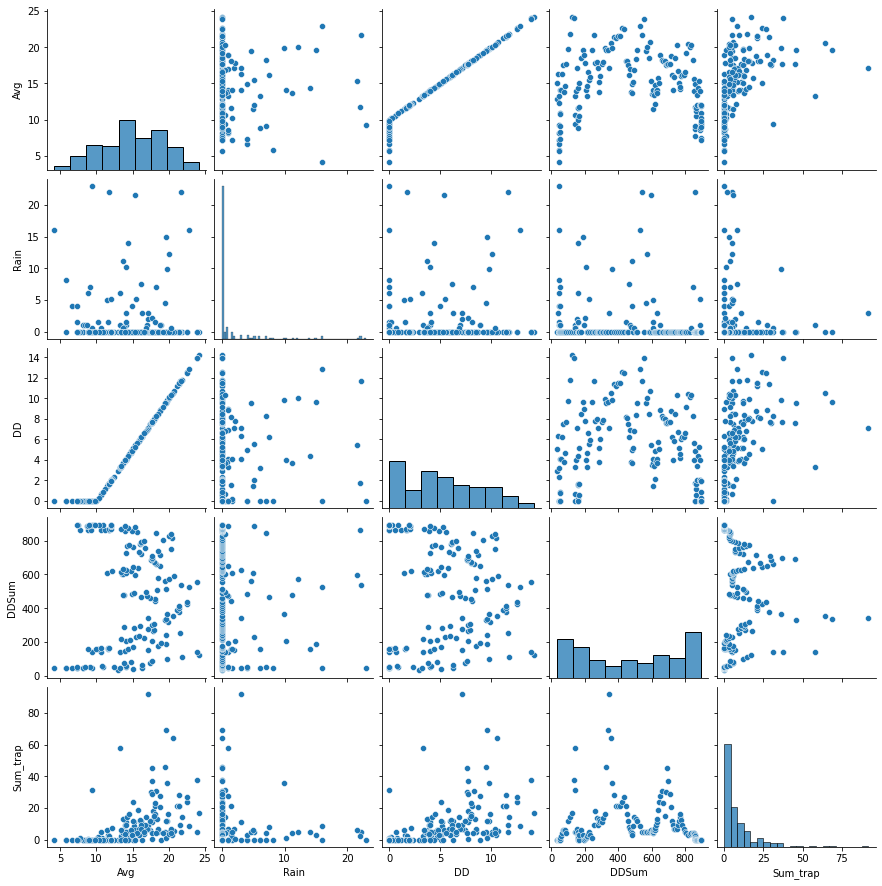

In [41]:
sns.pairplot(data_2005[['Avg', 'Rain', 'DD', 'DDSum', 'Sum_trap']], kind="scatter")
plt.show()

In [8]:
data_2005.describe()

,Avg,Rain,DD,DDSum,Trap1_Count,Trap2_Count,Trap1_Sum,Trap2_Sum,Sum_trap
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,14.952424,1.814545,5.248242,470.699394,4.736364,4.563636,404.424242,394.345455,9.300000
std,4.311656,4.510898,3.832448,303.503852,7.560440,6.423604,297.394881,289.957906,13.807121
min,4.150000,0.000000,0.000000,32.130000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.790000,0.000000,1.790000,163.190000,0.000000,0.000000,120.500000,107.000000,0.000000
50%,15.090000,0.000000,5.090000,480.350000,2.500000,2.000000,444.000000,462.000000,5.000000
75%,18.060000,1.000000,8.060000,763.270000,5.500000,7.000000,732.500000,706.000000,12.000000
max,24.190000,23.000000,14.190000,895.140000,49.000000,43.000000,781.500000,753.000000,92.000000


In [9]:
data_2006.describe()

,Avg,Rain,DD,DDSum,Trap1_Count,Trap2_Count,Trap1_Sum,Trap2_Sum,Sum_trap
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,16.648485,2.559394,6.682909,600.812727,3.430303,3.248485,312.254545,279.951515,6.678788
std,4.254355,7.737365,4.196288,385.958018,4.351162,4.271511,219.159158,215.564016,8.427407
min,8.770000,0.000000,0.000000,51.790000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.490000,0.000000,3.490000,164.310000,1.000000,0.500000,67.000000,40.500000,1.000000
50%,16.420000,0.000000,6.420000,621.670000,2.000000,1.500000,392.500000,347.500000,3.000000
75%,19.160000,1.300000,9.160000,965.200000,4.500000,4.000000,535.500000,503.000000,8.000000
max,26.580000,79.300000,16.580000,1152.970000,20.000000,19.000000,566.000000,536.000000,39.000000


# Heatmap

<AxesSubplot:>

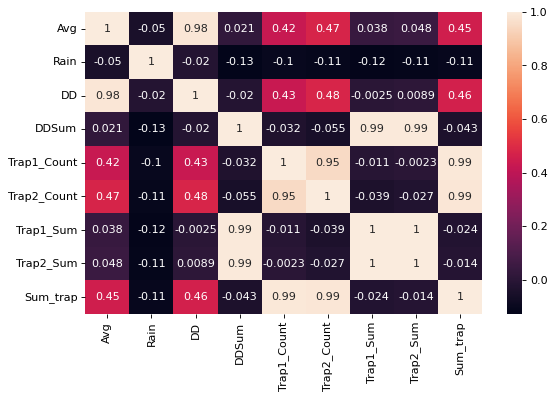

In [10]:
plt.figure(figsize=(8,5), dpi= 80)
sns.heatmap(data_2005.corr(), annot = data_2005.corr())

<AxesSubplot:>

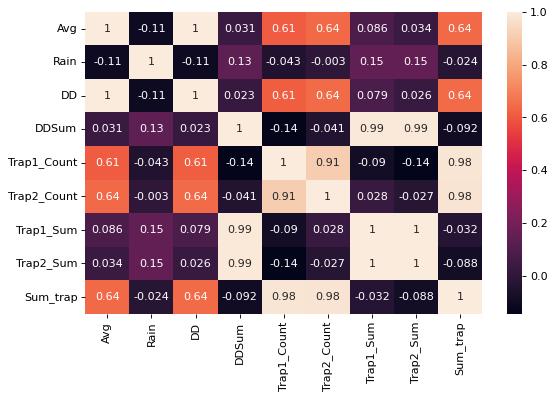

In [11]:
plt.figure(figsize=(8,5), dpi= 80)
sns.heatmap(data_2006.corr(), annot = data_2006.corr())

# Wykresy 

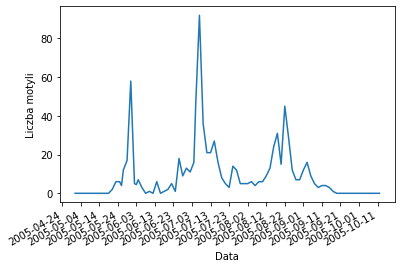

In [12]:
plot_data(data_2005)

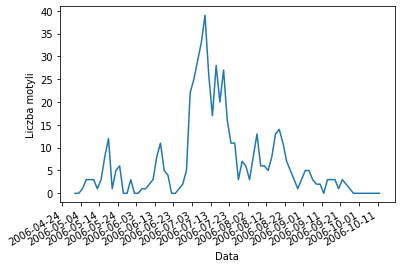

In [13]:
plot_data(data_2006)

# Testy

In [74]:
# prepared_data = data_2005[['Date', 'Avg', 'Trap1_Count','Trap2_Count','Trap3_Count']].copy()
# needed_columns = ['Date', 'Avg', 'Trap1_Count','Trap2_Count','Trap3_Count']

# df = data_2005.filter(['Date', 'Avg', 'Trap1_Count','Trap2_Count','Trap3_Count'], axis=1)
# df = data_2005.filter(['Date', 'Avg', 'Rain', 'DD','DDSum', 'Trap1_Count','Trap2_Count','Trap3_Count'])

df = data_2005.filter(['Date', 'Avg', 'Rain', 'DD', 'DDSum', 'Trap1_Count','Trap2_Count'])

In [75]:
df

,Date,Avg,Rain,DD,DDSum,Trap1_Count,Trap2_Count
0,01.01.2006,-2.22,3.0,0.0,0.00,0.0,0.0
1,02.01.2006,-1.61,3.8,0.0,0.00,0.0,0.0
2,03.01.2006,-0.97,11.7,0.0,0.00,0.0,0.0
3,04.01.2006,-1.45,5.0,0.0,0.00,0.0,0.0
4,05.01.2006,-4.77,0.0,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...
360,27.12.2006,0.22,0.0,0.0,1162.55,0.0,0.0
361,28.12.2006,-0.18,0.0,0.0,1162.55,0.0,0.0
362,29.12.2006,0.86,0.5,0.0,1162.55,0.0,0.0
363,30.12.2006,1.24,0.0,0.0,1162.55,0.0,0.0


In [76]:
# prepared_data['Trap3_Count'].count()

In [77]:
# df.update(df[needed_columns[2:]].fillna(0))
df["Trap1_Count"].where(df["Trap1_Count"] == 0.0, other=(df["Trap1_Count"].fillna(method='ffill') + df["Trap1_Count"].fillna(method='bfill'))/2, inplace=True)
df["Trap2_Count"].where(df["Trap2_Count"] == 0.0, other=(df["Trap2_Count"].fillna(method='ffill') + df["Trap2_Count"].fillna(method='bfill'))/2, inplace=True)
# df["Trap3_Count"].where(df["Trap3_Count"] == 0.0, other=(df["Trap3_Count"].fillna(method='ffill') + df["Trap3_Count"].fillna(method='bfill'))/2, inplace=True)
df = df.fillna(0)
df["Trap1_Sum"] = df["Trap1_Count"].cumsum()
df["Trap2_Sum"] = df["Trap2_Count"].cumsum()
# df["Trap3_Sum"] = df["Trap3_Count"].cumsum()

In [78]:
# df['sum_trap'] = df[needed_columns[2:]].sum(axis=1)
# df['Sum_trap'] = df[["Trap1_Count", "Trap2_Count", "Trap3_Count"]].sum(axis=1)
df['Sum_trap'] = df[["Trap1_Count", "Trap2_Count"]].sum(axis=1)

In [79]:
df.ne(0).idxmax().to_frame('pos').assign(val=lambda d: df.lookup(d.pos, d.index))

,pos,val
Date,0,01.01.2006
Avg,0,-2.22
Rain,0,3
DD,91,1.65
DDSum,91,1.65
Trap1_Count,123,0.5
Trap2_Count,125,0.5
Trap1_Sum,123,0.5
Trap2_Sum,125,0.5
Sum_trap,123,0.5


In [80]:
df = df.loc[120:284]
# df = df.loc[120:140]

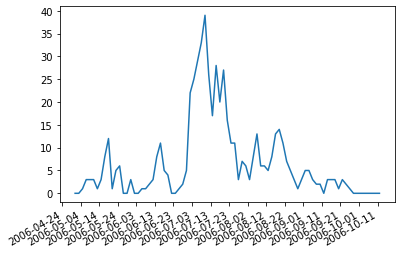

In [81]:

x_values = [datetime.datetime.strptime(d,"%d.%m.%Y").date() for d in df['Date']]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.plot(x_values,df['Sum_trap'])
plt.gcf().autofmt_xdate()
plt.show()

In [82]:
df.loc[140:284]

,Date,Avg,Rain,DD,DDSum,Trap1_Count,Trap2_Count,Trap1_Sum,Trap2_Sum,Sum_trap
140,21.05.2006,11.39,2.0,1.39,125.79,0.0,1.0,40.0,29.5,1.0
141,22.05.2006,16.68,0.0,6.68,132.47,1.5,1.5,41.5,31.0,3.0
142,23.05.2006,16.18,0.0,6.18,138.65,3.0,2.0,44.5,33.0,5.0
143,24.05.2006,12.67,0.0,2.67,141.31,4.0,1.5,48.5,34.5,5.5
144,25.05.2006,11.81,0.8,1.81,143.13,5.0,1.0,53.5,35.5,6.0
...,...,...,...,...,...,...,...,...,...,...
280,08.10.2006,11.54,0.0,1.54,1149.50,0.0,0.0,566.0,536.0,0.0
281,09.10.2006,11.44,0.0,1.44,1150.94,0.0,0.0,566.0,536.0,0.0
282,10.10.2006,10.61,0.0,0.61,1151.55,0.0,0.0,566.0,536.0,0.0
283,11.10.2006,10.82,0.0,0.82,1152.37,0.0,0.0,566.0,536.0,0.0


In [83]:
df.index[df['Date'] == '10.12.2005']

Int64Index([], dtype='int64')

In [84]:
new_df = df[['Date', 'Avg','DD','DDSum', 'Rain','Sum_trap']].copy()

In [85]:
new_df.to_csv("../data/forModels/clean_data_2005.csv",index=False)

In [86]:
f = pd.read_csv("../data/forModels/clean_data_2005.csv")

In [87]:
f

,Date,Avg,DD,DDSum,Rain,Sum_trap
0,01.05.2006,11.45,1.45,51.79,2.5,0.0
1,02.05.2006,11.62,1.62,53.41,0.5,0.0
2,03.05.2006,12.53,2.53,55.94,0.0,0.0
3,04.05.2006,13.41,3.41,59.35,0.0,0.5
4,05.05.2006,13.79,3.79,63.14,0.0,1.0
...,...,...,...,...,...,...
160,08.10.2006,11.54,1.54,1149.50,0.0,0.0
161,09.10.2006,11.44,1.44,1150.94,0.0,0.0
162,10.10.2006,10.61,0.61,1151.55,0.0,0.0
163,11.10.2006,10.82,0.82,1152.37,0.0,0.0
